In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import numpy as np
import qutip as qt 
from ECD_control.ECD_optimization.batch_optimizer import BatchOptimizer
from ECD_control.ECD_optimization.optimization_analysis import OptimizationAnalysis, OptimizationSweepsAnalysis
from ECD_control.ECD_pulse_construction.ECD_pulse_construction import *
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9931761182166584977
 xla_global_id: -1]

In [24]:
#The target oscillator state.
N =40
Fock = 1
psi_t = qt.basis(N,1) #target state

In [ ]:
#Optimization of ECD Circuit parameters (betas, phis, and thetas)
#the optimization options
opt_params = {
'N_blocks' : 5, #circuit depth
'N_multistart' : 200, #Batch size (number of circuit optimizations to run in parallel)
'epochs' : 200, #number of epochs before termination
'epoch_size' : 10, #number of adam steps per epoch
'learning_rate' : 0.02, #adam learning rate
'term_fid' : 0.995, #terminal fidelitiy
'dfid_stop' : 1e-6, #stop if dfid between two epochs is smaller than this number
'beta_scale' : 3.0, #maximum |beta| for random initialization
'initial_states' : [qt.tensor(qt.basis(2,0),qt.basis(N,0))], #qubit tensor oscillator, start in |g> |0>
'target_states' : [qt.tensor(qt.basis(2,0), psi_t)], #end in |g> |target>.
'name' : 'Fock1', #name for printing and saving
'filename' : None, #if no filename specified, results will be saved in this folder under 'name.h5'
}
#note: optimizer includes pi pulse in every ECD step. However, final ECD step is implemented 
#in experiment as a displacement since the qubit and oscillator should be disentangled at this point.
#So, we ask the optimizer to end in |e> |target> instead of |g>|target>.

In [18]:
#create optimization object. 
#initial params will be randomized upon creation
opt = BatchOptimizer(**opt_params)

#print optimization info. 
opt.print_info()

optimization_type: state transfer
N_multistart: 200
N_blocks: 5
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.02
epoch_size: 10
epochs: 200
beta_scale: 3.0
alpha_scale: 1.0
theta_scale: 3.141592653589793
use_etas: False
use_displacements: False
use_phase: False
name: Fock1
comment: 
N_cav: 40
filename: Fock1.h5

Best circuit parameters found:
betas:         [-0.39172+0.54603j -1.5027 +1.15308j -1.08406+1.19882j -1.82555+1.81816j
  0.01325-2.7043j ]
alphas:        [0.+0.j]
phis (deg):    [   0.       104.79691  -88.24223 -147.5373   110.42788]
etas (deg):    [89.99999 89.99999 89.99999 89.99999 89.99999]
thetas (deg):  [ 111.19642   49.17658    0.71777   52.63184 -157.07845]
Max Fidelity:  0.284790




In [19]:
#run optimizer.
#note the optimizer can be stopped at any time by interrupting the python consle,
#and the optimization results will still be saved and part of the opt object.
#This allows you to stop the optimization whenever you want and still use the result.
opt.optimize()

Start time: 2022-04-13 17:05:49
 Epoch: 6 / 200 Max Fid: 0.995462 Avg Fid: 0.669375 Max dFid: 0.180225 Avg dFid: 0.059785 Elapsed time: 0:00:37.653127 Remaing time: 0:20:17.451120

 Optimization stopped. Term fidelity reached.

optimization_type: state transfer
N_multistart: 200
N_blocks: 5
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.02
epoch_size: 10
epochs: 200
beta_scale: 3.0
alpha_scale: 1.0
theta_scale: 3.141592653589793
use_etas: False
use_displacements: False
use_phase: False
name: Fock1
comment: 
N_cav: 40
filename: Fock1.h5

Best circuit parameters found:
betas:         [-0.23396+1.28436j  0.61043+0.40037j -0.65995+0.23907j  0.24265+0.53572j
 -0.0294 +0.03231j]
alphas:        [0.+0.j]
phis (deg):    [   0.        93.35716 -102.31286  -84.61694   -1.10573]
etas (deg):    [89.99999 89.99999 89.99999 89.99999 89.99999]
thetas (deg):  [ -88.36313 -111.32247   62.31546  122.82364   91.68735]
Max Fidelity:  0.996364


all data saved as: Fock1.h5
termination re

'2022-04-13 17:05:49'

In [9]:
#can print info, including the best circuit found.
opt.print_info() 

optimization_type: state transfer
N_multistart: 200
N_blocks: 5
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.02
epoch_size: 10
epochs: 200
beta_scale: 3.0
alpha_scale: 1.0
theta_scale: 3.141592653589793
use_etas: False
use_displacements: False
use_phase: False
name: Fock 1
comment: 
N_cav: 40
filename: Fock 1.h5

Best circuit parameters found:
betas:         [ 1.57746+0.21157j -0.16296+1.13233j -0.74199+0.36595j -1.36833+0.13067j
  0.10875+0.08009j]
alphas:        [0.+0.j]
phis (deg):    [   0.        84.95369  -70.85485 -110.21238   17.42432]
etas (deg):    [89.99999 89.99999 89.99999 89.99999 89.99999]
thetas (deg):  [-87.1226   86.17512 -73.47289  28.27246  93.67217]
Max Fidelity:  0.995860




In [21]:
#can also get the best circuit parameters directly, could save this to a .npz file.
best_circuit =  opt.best_circuit()
betas = best_circuit['betas']
phis = best_circuit['phis']
thetas = best_circuit['thetas']
print(best_circuit)

{'fidelity': 0.996364, 'betas': array([-0.23395887+1.2843633j ,  0.6104285 +0.4003673j ,
       -0.6599459 +0.23907052j,  0.24264628+0.53572315j,
       -0.02940109+0.03231468j], dtype=complex64), 'alphas': array([0.+0.j], dtype=complex64), 'phis': array([ 0.        ,  1.62939   , -1.7856963 , -1.4768443 , -0.01929855],
      dtype=float32), 'etas': array([1.5707963, 1.5707963, 1.5707963, 1.5707963, 1.5707963],
      dtype=float32), 'thetas': array([-1.5422275, -1.9429436,  1.08761  ,  2.143677 ,  1.6002462],
      dtype=float32)}


In [22]:
#Analysis of the results. Can load the .h5 file.
#all data is stored as a timestamp in a .h5 file
#You can also specify which timestamp you are analyzing. Be defult, it will use the most recent optimization in the file.
#I  recommend using "HDFview" software to understand data structure
filename = opt.filename
filename = 'Fock1.h5' % Fock
analysis = OptimizationAnalysis(filename)
analysis.print_info() #we can print info of best circuit

TypeError: not all arguments converted during string formatting

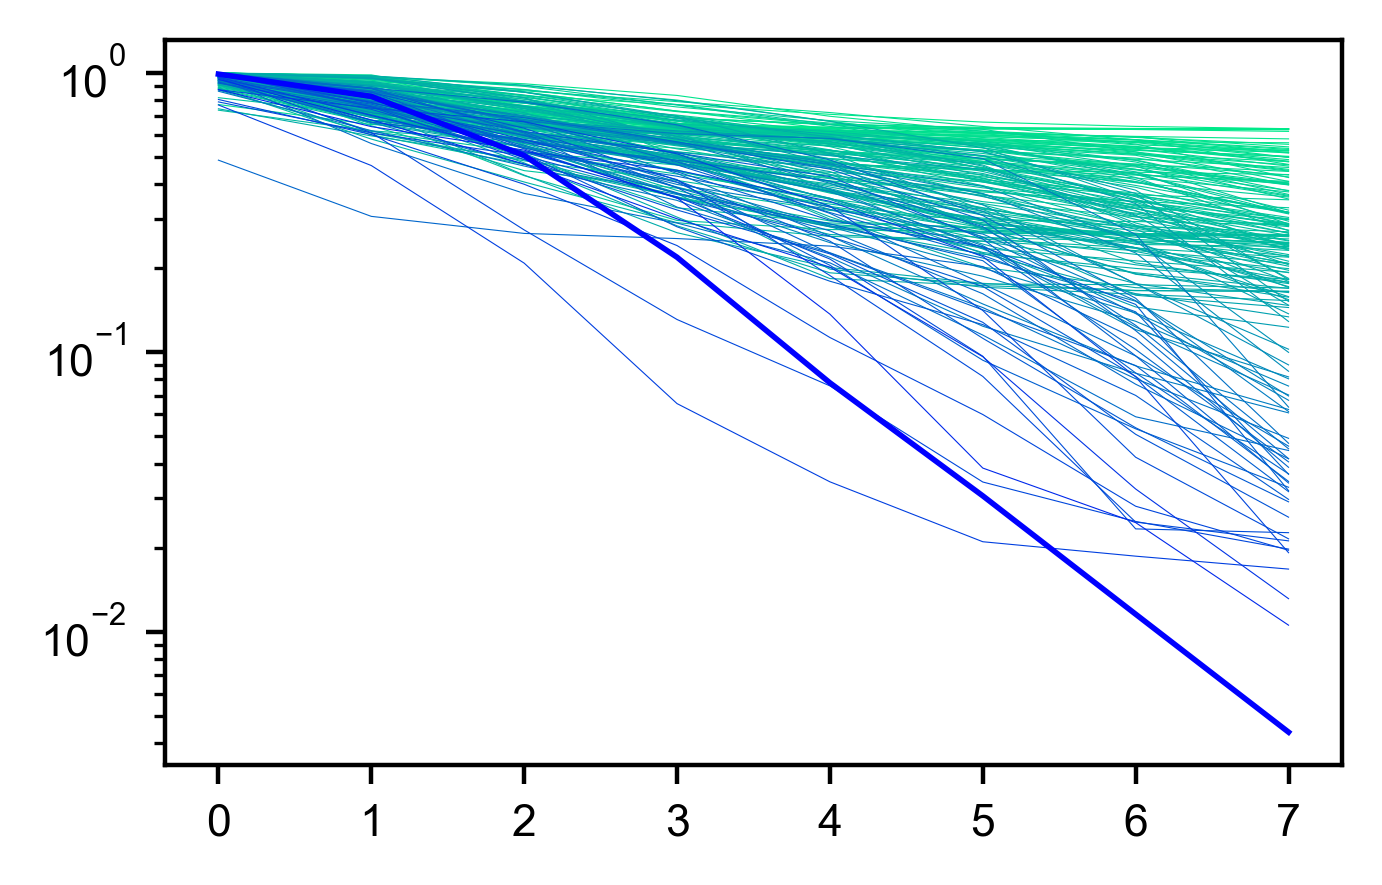

In [14]:
#We can plot the fidelities of the different parallel optimizations. 
# x axis is epoch
analysis.plot_fidelities()

In [11]:
#Can also get the "best circuit" from a loaded analysis object
best_circuit = analysis.best_circuit()
betas = best_circuit['betas']
phis = best_circuit['phis']
thetas = best_circuit['thetas']
print(best_circuit)

{'fidelity': 0.9956374, 'betas': array([-1.6746027 +9.6890062e-01j, -0.4265962 -1.6113380e+00j,
       -1.2739965 -2.2163001e-01j, -0.42474332+3.8194054e-01j,
       -1.0014281 -6.9088477e-01j, -0.8089165 -5.3195804e-01j,
       -0.00189993-1.4480036e-03j], dtype=complex64), 'alphas': array([0.+0.j], dtype=complex64), 'phis': array([ 0.        , -1.5600588 , -1.5899594 , -1.543707  , -1.6062431 ,
       -1.5294234 , -0.03219175], dtype=float32), 'thetas': array([ 1.5711944 ,  1.40575   , -2.1706996 , -1.673989  , -1.0173814 ,
       -0.42896032,  1.5620778 ], dtype=float32)}


In [12]:
#Now, we can take the parameters found (betas, phis, and thetas)
#and use them to produce a ECD oscillator and qubit pulse.
#This requies us to specify the calibrated experimental parameters.

#The following parameters for the oscillator will be used to build the oscillator pulse.
#Here, assume that a gaussian displacement pulse to alpha=1.0 has been calibrated.
storage_params = {
        "chi_kHz": 33, #dispersive shift in kHz
        "chi_prime_Hz": 1, #second order dispersive shift in Hz
        "Ks_Hz": 0, #Kerr correction not implemented here.
        "unit_amp": 0.01, #DAC amplitude (at maximum of pulse) for gaussian displacement to alpha=1.
        "sigma": 11, #oscillator displacement pulse sigma
        "chop": 4, #oscillator displacement pulse chop (number of sigmas to include in gaussian pulse)
    }

#In a similar way, the qubit pulse parameters will be specified by a calibrated pi pulse.
#unit_amp is the DAC amplitude (at maximum of pulse) for a calibrated gaussian pi pulse, with sigma and chop specified
qubit_params = {'unit_amp': 0.5, 'sigma': 6, 'chop': 4} #parameters for qubit pi pulse.


#creating the "Fake storage" and "Fake qubit" objects which are used
#for pulse cration
storage = FakeStorage(**storage_params)
qubit = FakeQubit(**qubit_params)

#The maximum displacement used during the ECD gates.
alpha_CD = 30
#Small delay to insert between oscillator and qubit pulses to ensure timing is okay.
buffer_time = 4

In [13]:
#From these calibrations, the storage and qubit objects calculate the
#conversion between DAC amplitude, and drive amplitude in MHz.
#so, [Omega(t) in MHz] = [Omega(t) in DAC units]*Omega_m_MHz 
#and [Omega(t) in MHz] = [Omega(t) in DAC units]*Omega_m_MHz.
#These parameters also represent the maximum drive amplitude,
#since the DAC max amplitude is 1 (assuming amplifiers don't saturate.)
print('Maximum oscillator drive amplitude: |epsilon|/2*pi < %.3f MHz' % storage.epsilon_m_MHz)
print('Maximum qubit drive amplitude: |Omega|/2*pi < %.3f MHz' % qubit.Omega_m_MHz)

Maximum oscillator drive amplitude: |epsilon|/2*pi < 690.790 MHz
Maximum qubit drive amplitude: |Omega|/2*pi < 40.468 MHz


In [14]:
#generating the oscillator and qubit pulses (epsilon and Omega)
#set 'chi_prime_correction = True' to correct for linear part of chi'
#final_disp = True will implement final ECD gate as a gaussian displacement instead of full ECD gate.
#This option is useful if the qubit and oscillator are disentangled after the gate.
pulse_dict = conditional_displacement_circuit(betas, phis, thetas, storage, qubit,
                     alpha_CD,buffer_time=buffer_time, kerr_correction = False, chi_prime_correction=True, final_disp=True, pad=True)

#The dictionary will contain the pulses, in DAC units.
#Also, the displacements used for each ECD gate (the "alphas")
cavity_dac_pulse, qubit_dac_pulse,alphas = pulse_dict['cavity_dac_pulse'], pulse_dict['qubit_dac_pulse'], pulse_dict['alphas']
print('alphas:')
print(alphas)

/home/rsl/miniconda3/envs/jupyterhub/lib/python3.7/site-packages/scipy/signal/_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


alphas:
[30.04311449177611, 30.1959048013861, 30.10215372980626, 29.45709051161263, 30.16427503275452, 30.22088604451357]


Text(0.5, 0, 'ns')

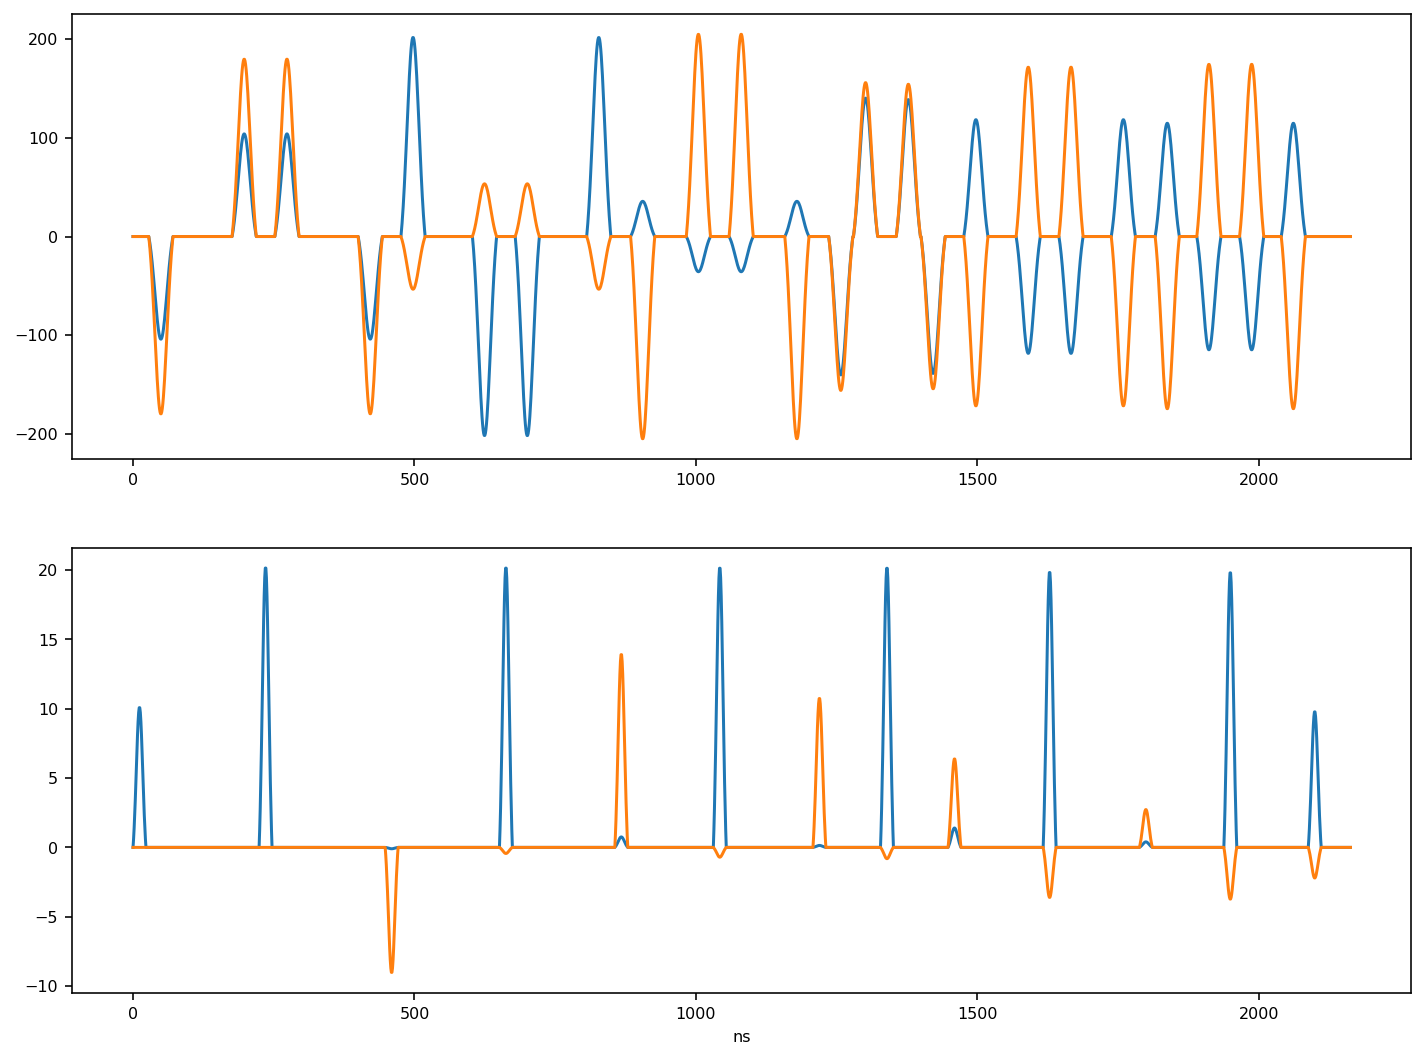

In [15]:
#plotting the pulse, in units of MHz. It could also be fed into a time-domain simulation.
fig, axs = plt.subplots(2,1)
axs[0].plot(np.real(storage.epsilon_m_MHz*cavity_dac_pulse))
axs[0].plot(np.imag(storage.epsilon_m_MHz*cavity_dac_pulse))
axs[1].plot(np.real(qubit.Omega_m_MHz*qubit_dac_pulse))
axs[1].plot(np.imag(qubit.Omega_m_MHz*qubit_dac_pulse))
plt.xlabel('ns')